# Height vs Weight

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('HvsW_Dataset.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
df['Gender'] = df['Gender'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  10000 non-null  category
 1   Height  10000 non-null  float64 
 2   Weight  10000 non-null  float64 
dtypes: category(1), float64(2)
memory usage: 166.2 KB


### Las unidades de altura ('Height') y peso ('Weight') estan dadas en pulgadas (inches) y libras (pounds) respectivamente, por esa razon, se crea dos nuevas columnas para cada variable pero con unidades de centímetros para altura y kilogramos para el peso.

$$1\left(Centímetro\right) = 2,54\left( Pulgadas\right)$$

$$1\left(Kilogramo\right) = 2.20462\left( Libras\right)$$

In [13]:
df['Height(cm)'] = df['Height']* 2.54
df['Height(cm)'] = np.round(df['Height(cm)'],1)
df['Height(cm)'].head()

0    187.6
1    174.7
2    188.2
3    182.2
4    177.5
Name: Height(cm), dtype: float64

In [14]:
df['Weight(Kg)'] = df['Weight']/ 2.20462
df['Weight(Kg)'] = np.round(df['Weight(Kg)'],1)
df['Weight(Kg)'].head()

0    109.7
1     73.6
2     96.5
3     99.8
4     93.6
Name: Weight(Kg), dtype: float64

In [15]:
df.head()

,Gender,Height,Weight,Height(cm),Weight(Kg)
0,Male,73.847017,241.893563,187.6,109.7
1,Male,68.781904,162.310473,174.7,73.6
2,Male,74.110105,212.740856,188.2,96.5
3,Male,71.730978,220.042470,182.2,99.8
4,Male,69.881796,206.349801,177.5,93.6


In [20]:
df.groupby('Gender').size()

Gender
Female    5000
Male      5000
dtype: int64

### Existen 5000 datos de altura y peso tanto para hombres como para mujeres, lo que indica que el dataset se encuentra balanceado para la variable categórica de genero ('Gender')

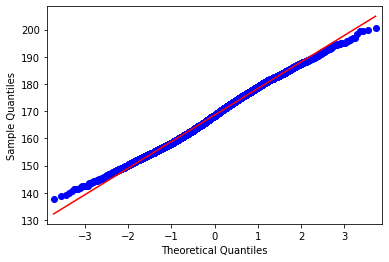

In [44]:
sm.qqplot (df['Height(cm)'], line=  'r')
plt.show()

<AxesSubplot:xlabel='Height(cm)', ylabel='Density'>

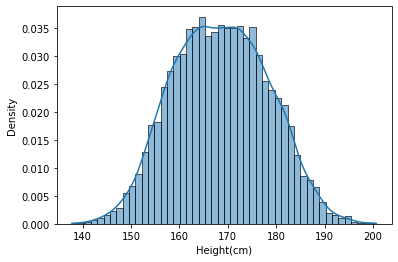

In [24]:
sns.histplot(df['Height(cm)'], stat= 'density', kde=True)

### (CORREGIR)La variable de altura presenta una distribucion normal, como muestra la figura indica que el 50% por ciento de los datos son menores que la media y el otro 50% de los datos son mayores que la misma.

## ¿Tendrá el mismo comportamiento el peso?

<AxesSubplot:xlabel='Weight(Kg)', ylabel='Density'>

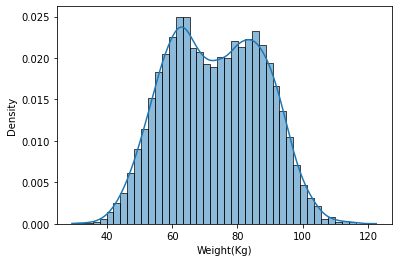

In [25]:
sns.histplot(df['Weight(Kg)'], stat= 'density', kde=True)

In [28]:
df[['Weight','Weight(Kg)']].describe()

,Weight,Weight(Kg)
count,10000.000000,10000.000000
mean,161.440357,73.228450
std,32.108439,14.563844
min,64.700127,29.300000
25%,135.818051,61.600000
50%,161.212928,73.100000
75%,187.169525,84.900000
max,269.989699,122.500000


### (CORREGIR) Aunque la media y la mediana se acercan mucho y casi tienen el mismo valor, vemos que la figura no corresponde a una campana de distribución normal, esta se asemeja mas a una distribucion bimodal.

In [30]:
import statsmodels.api as sm

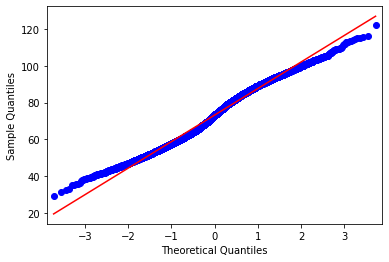

In [45]:
sm.qqplot (df['Weight(Kg)'], line=  'r')
plt.show()

In [46]:
from scipy.stats import kstest

In [53]:
stat, p = kstest(df['Height(cm)'], 'norm')

print('Stat: ', stat)
print('P-Value: ', p)

Stat:  1.0
P-Value:  0.0
